# SNLP Assignment 4

Name 1: <br/>
Student id 1: <br/>
Email 1: <br/>


Name 2: <br/>
Student id 2: <br/>
Email 2: <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the Python file for exercise 2. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Exercise 1: Encodings (3 points)

#### 1.1 (0.5 points)

What are the benefits of having a fixed-width code as opposed to variable-width? e.g. `0011` for `e` and `1111001010` for `Z` (since `e` is much more common than `Z`, this would save some space in variable length encoding).

Imagine that you are given a string in UTF16 (variable-width character encoding). What issues can you encounter? Provide a specific engineering example. 

#### 1.2 (1 point)

The ASCII encoding uses 8 bits per single character. The target alphabet in this case is binary: $\{0, 1\}$. Given a text of length $n$, the encoding takes $n\times 8$ bits in memory (without taking alignment into consideration).

- How would you adapt the ASCII encoding if the target alphabet had three symbols $\{0,1,2\}$?
- How many "trits" (number of symbols from  {0,1,2}) would it take to encode $n$ characters in this new system? Be precise in your mathematical explanation, and be careful which way you round and beware of $\pm 1$ errors.
- The UTF32 encoding uses 32 bits per single character. How does your computation change?


#### 1.3 (1.5 points)

Given the following text, construct a [Huffman tree](https://en.wikipedia.org/wiki/Huffman_coding) and encode it (at character level).

- Show the final tree (ideally as a diagram together with frequency counts). You can work it out on a paper and include a photograph.
- Show the encoded sequence (ideally in comparison to ASCII encoded sequence in binary).
- Compare the length to ASCII encoding (n*8 characters). What improvement did you achieve? Could you expect the same amount of improvement on the entirety of Wikipedia?

```
Three thousand three hundred and thirty-three silver syringes.
```

Treat space as a character as well and `t` and `T` as two different characters.

## **ANSWER Exercise 1**


## 1.1 ## 
The main benefit of fixed-width code is the unambiguous interpretation of the message (clear borders between encoded codes). This benefit only applies to non-prefix codes.  Additionally, random access to the information is an advantage. For example if a N length message is encoded using D bit each message. Total length of encoded message would be $N*D$.  n-th position of message could be recovered by accessing the encoded message from $n * D$ position to $(n * D+1)$. 

e.g. in UTF-16 (hexadec):  
C(4) = 4  
C(,) = 44  
C(K) = 4b  
C(´) = b4  
so:  
C(,K,) = 444b44 $==$ C(4,´4) = 444b44  


## 1.2 ##
   **1.2.1**
- In ASCII encoding characters are represented by 8 bit. Hence, total number of possible character represented by ASCII would be $2^8 = 256$. Now that we are considering our alphabet has three output symbol (not binary). We would try to find the total number of bits required to represent single character so that the trits will cover whole 256 characters in ASCII using following technique.

  $2^x = 256, \text{in case of binary output}$
   In case of trinary output,

   $3^x = 256$

   $x * log_2{3} = log_2{256}$

   Now, we try to calculate value of x such that we can get the number of trits to represent the ASCII characters.

**1.2.2**
  
  From 1.2, we can calculate the value of x to be $5.04743802857166$ = 6. Hence, we need 5 bit to represent each characters. Therefore, to represent n length of string, we need 6 * n trits.

**1.2.3**
  
  Now if we have UTF-32 encoding, total number of characters represented are $2^{32}$. Hence, for trinary representation, each character would be represented as $log_2{2^{32}}/log_2{3}$ = 21 trits
  = $21 \text{trits would be the answer}$. To encode n characters, we require n * 21 trits.
  
  
## 1.3 ##

It's better than ASCII bc max nr of bits is 7 (vs. ASCII 8) --> variable length encoding.
It won't be better on the whole Wikipedia corpus, since the upper bound for the nr of bits is unpredictable and heavily reliant on the frequency distribution within a corpus.



## Exercise 2: Conditional Entropy of DNA (7 points)
In this exercise, we will see how conditional entropy is calculated for genome sequences. Read the instructions given below carefully.

### 2.0 Getting started with biopython

1. **Installing biopython** <br/>
Install [biopython](https://biopython.org/) to your local Python environment. Dependencies should be installed automatically. <br/>
The installation instructions for biopython are given in the attached link. A simple pip installation does the trick. 
2. **Saving data files**  <br/>
Download the genome of *Drosophila melanogaster* from [kaggle](https://www.kaggle.com/mylesoneill/drosophila-melanogaster-genome?select=genome.fa). For this, you wil need to create an account on kaggle. <br/> 
To save the data files you download, create a folder called `data` and save the csv and fasta files directly in this folder, since the same path will be used for retrieving the relevant files, as you can see below in the provided code. Conversely, you can simply rename the `archive` folder as `data`. 
3. **How to read a fasta file**  <br/>
As your first task, you have to sample a reduced version of the genome using the pre-implemented `sample_records` function in `exercise_2.py`. The function will write the reduced genome to a [fasta](https://en.wikipedia.org/wiki/FASTA_format) file. <br/>
Biopython can be imported in your Python file with the statement `import Bio`. 
For reading fasta files, look up how to utilise biopython's SeqIO module for parsing the file structure to read genome information in the form of sequences. The result should be akin to reading a list of sentences from a text file. Check the `sample_records` function for further guidance. 
4. **Understanding genome sequences** <br/>
Parsing the fasta file results in an [iterator](https://wiki.python.org/moin/Iterator) of sequence records for the genomes in a class called SeqRecord. <br/>
Structure: *SeqRecord* <br/>
Elements: <br/>
o Meta-features of the sequence (*Name*, *Id*, *Description*, *Number of features*) <br/>
o The actual sequence of nucleotides (*Seq*) <br/>
These sequences comprise chains formed of the same basic building blocks - the nucleotides A, G, C, T. You will observe that these sequences are case sensitive i.e. they contain both uppercase and lowercase chains. We will explicitly tell you what they mean and how to handle them over the course of this exercise. <br/>
5. **Processing genome sequences** <br/>
We can deal with the obtained sequences as if they were normal Python strings. Your goal is to first combine all these sequences into a continuous string of nucleotides, and then extract k-mers from this final "text" corpus.
5. **Difference between k-mers and n-grams** <br/>
For all intents and purposes, k-mers are to genome sequences what n-grams are to word sequences.

In [1]:
# 2.0 Sample a reduced version of the genome
from importlib import reload
from pathlib import Path

import exercise_2
exercise_2 = reload(exercise_2)

N = 100

genome_loc = Path("data/genome.fa")
genome_red_loc = Path("data/genome_reduced.fa")

exercise_2.sample_records(genome_loc, genome_red_loc, N)

### 2.1: K-mers (0.5 points) 

[k-mers](https://en.wikipedia.org/wiki/K-mer) are sequences of nucleotides of length $k$. You can see them as the DNA variant of n-grams, only with nucleotides as its "words".

Implement the function `get_k_mers` that assembles sequences of nucleotides from the fasta file produced in 2.0. For now, convert all characters to uppercase.

e. g. for a sequence
```
GTAGAGCTGT
```
The 2-mers to be sampled are, just as in a bigram language model:
```
GT, TA, AG, GA, AG, GC, CT, TG, GT
```
This example is taken from the Wikipedia article, see there for higher $k$. 

Now, show the output of the function for $k = 2$, i. e. all 2-mers.

In [2]:
# 2.1 get k-mers
k_mers = exercise_2.get_k_mers(genome_red_loc, 2)
print(k_mers) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 2.2 K-mer language models (3 points)

*  Implement the function `k_mer_statistics`. It should estimate $K$ language models with k-mer sizes $1,...,K$, and return two probability distributions: <br/>
a) relative k-mer frequencies and <br/>
b) conditional k-mer probabilities. <br/>
As always, you may modify the function signature to suit your needs (but you must comment on the changes you make). (2.5 points) <br/>

 **Hint:** Calculate the relative frequencies up to K, and then use these for calculating the $k^{th}$ level conditional probabilities using the $(k-1)^{th}$ level relative frequencies. (Refer to the formulae you obtained in Assignment 2 Ex. 2.1)
* Plot the probabilites of all k-mers for $K=5$ language models vs their rank, and use the log-log scale on the axes. Do so by implementing the function `plot_k_mers`. Does the curve look similar to the one you obtained for natural language? (0.5 points)

K-mers relative frequency for k = 1 has probability mass loss acceptable
K-mers relative frequency for k = 2 has probability mass loss acceptable
K-mers relative frequency for k = 3 has probability mass loss acceptable
K-mers relative frequency for k = 4 has probability mass loss acceptable
K-mers relative frequency for k = 5 has probability mass loss acceptable


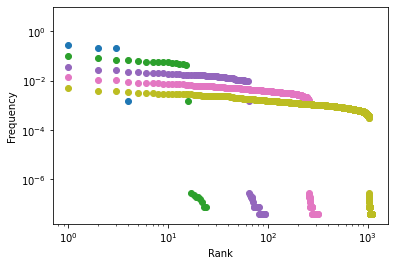

<Figure size 800x800 with 0 Axes>

In [3]:
# 2.2 k-mer statistics
rel_freqs, cond_probs = exercise_2.k_mer_statistics(genome_red_loc, K=5)
# plot
exercise_2.plot_k_mers(rel_freqs)

In [ ]:
# 2.2 k-mer statistics, cleaning by removing the sequencing errors, i. e. unreadable parts of the DNA.
rel_freqs, cond_probs = exercise_2.k_mer_statistics(genome_red_loc, K=5, remove_seq_error=True)
# plot
exercise_2.plot_k_mers(rel_freqs)

In [ ]:
# 2.2 k-mer statistics
rel_freqs, cond_probs = exercise_2.k_mer_statistics(genome_red_loc, K=5, remove_N = True)

# plot
exercise_2.plot_k_mers(rel_freqs)

### 2.3 Conditional entropy (1.5 point)
We want to observe how the conditional entropy of our small DNA corpus changes with increasing k-mer size. Conditional Entropy is defined as

\begin{equation}
H(W|H) = - \sum_{i} p(w_i,h_i) \cdot \log_2p(w_i|h_i)
\end{equation}

Where $p(w_i,h_i)$ is the relative frequency of $(w_i, h_i)$ and $p(w_i|h_i)$ is the conditional probability of $w_i$ given the history $h_i$.  

* What do $w_i$, $h_i$ and the probabilities derived from them correspond to in the context of DNA? (0.5 Points)

* Using your insights from above, implement the function `conditional_entropy`, that calculates the conditional entropy of a k-mer language model. You may modify the function signature as you wish. (0.5 points)

* Estimate up to $K=20$ k-mer language models, calculate their conditional entropies and plot by ascending $k$. What do you observe? (0.5 points)

0-mer cond. entropy is 2.2590331778669808
1-mer cond. entropy is 1.7293483275639292
2-mer cond. entropy is 1.722366635554933
3-mer cond. entropy is 1.708505530116622
4-mer cond. entropy is 1.6838683590505035
5-mer cond. entropy is 1.6416832621869604
6-mer cond. entropy is 1.561615959700252
7-mer cond. entropy is 1.3682744252268395
8-mer cond. entropy is 0.9464363029575379
9-mer cond. entropy is 0.48243528713207373
10-mer cond. entropy is 0.21102616180736958
11-mer cond. entropy is 0.09749378507967085
12-mer cond. entropy is 0.054607577566639115
13-mer cond. entropy is 0.039993380681409896
14-mer cond. entropy is 0.03412509609109098
15-mer cond. entropy is 0.030979057855806062
16-mer cond. entropy is 0.028909563138094983
17-mer cond. entropy is 0.02727970306926892
18-mer cond. entropy is 0.025820527884275597
19-mer cond. entropy is 0.02468249529991821


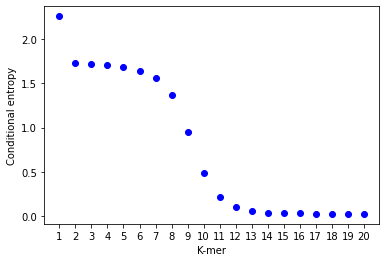

In [4]:
# 2.3 conditional entropy
K = 20

H_ks = []

rel_freqs, cond_probs = exercise_2.k_mer_statistics(genome_red_loc, K=20)

for k in range(0, K):
  H_k = exercise_2.conditional_entropy(rel_freqs[k], cond_probs[k])
  print("{}-mer cond. entropy is {}".format(k, H_k))
  H_ks.append(H_k)

# plot
exercise_2.plot_conditional_entropies(H_ks)

### 2.4 Tandem repeats (2 points)

A [tandem repeat](https://en.wikipedia.org/wiki/Tandem_repeat) or a mini/microsattelite is a sequence of nucleotides that is repeated multiple times, and the repetitions are immediately adjacent. This example is again taken from the Wikipedia article:

```
ATTCG ATTCG ATTCG
```

In the *Drosophila Melanogaster* genome, tandem repeats are represented by lowercase letters, while the non-repeating sequences are in uppercase. Up to 2.3, we ignored tandem repeats and considered all sequences in uppercase. 

* Read up about tandem repeats, and tell what your expectations about the conditional entropy of tandem repeat regions are as opposed to non-tandem repeat regions (0.5 points)

* Implement the functions `get_k_mers_24` and `k_mer_statistics_24` and sample the same language models as in 2.2, but this time exclusively on tandem repeats or non-tandem repeats. This should yield two sets of language models $LM_{TR}$ and $LM_{\neg TR}$. (1 point)

* Calculate the conditional entropies of both $LM_{TR}$ and $LM_{\neg TR}$. Plot the conditional entropies vs. increasing $K$ as in 2.3. Do you observe any difference? Does it follow your expectation from above? (0.5 points)

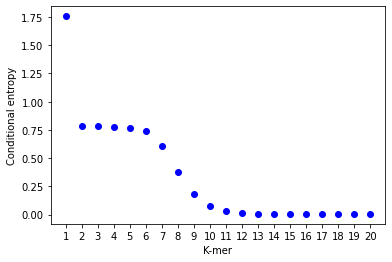

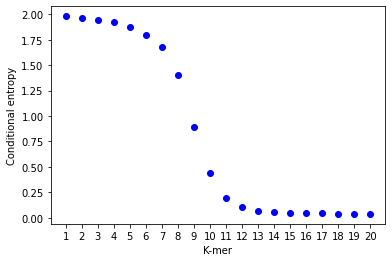

In [7]:
# 2.4.1 tandem repeats
H_ks = []

rel_freqs, cond_probs = exercise_2.k_mer_statistics_24(genome_red_loc, K, tandem_repeats=True)

for k in range(K):
  H_k = exercise_2.conditional_entropy(rel_freqs[k], cond_probs[k])
  H_ks.append(H_k)

# plot
exercise_2.plot_conditional_entropies(H_ks)

# 2.4.2 non tandem repeats
H_ks = []

rel_freqs, cond_probs = exercise_2.k_mer_statistics_24(genome_red_loc, K, tandem_repeats=False)

for k in range(K):
  H_k = exercise_2.conditional_entropy(rel_freqs[k], cond_probs[k])
  H_ks.append(H_k)

# plot
exercise_2.plot_conditional_entropies(H_ks)

## Bonus (1.5 points)

The standard Huffman encoding uses a binary target alphabet $\{0,1\}$. Assume that you're given a text in alphabet $\Sigma$ and you compress one input symbol from the alphabet at a time.

- Could you adapt the algorithm so that it utilizes three output symbols $\{0,1,2\}$?
- What about $k$ target symbols ($k < $ alphabet size)?
-  What would happen if you used $\Sigma$ as the output alphabet for Huffman encoding? Would the text remain the same? Would it have the same length?
- What changes if the input is words (i.e. sequences from the $\Sigma$ alphabet with one symbol representing the word boundary)?
- What changes if you are allowed to use phrases (i.e. ignore the word boundary) if it helps compression?

Answer these questions in 1-2 sentences max.

Answer
1. In huffman coding, we create a binary tree as we take 2 character of same occurence and assign 0 to one and 1 to another. However, now if we have to utilize output symbol ${0,1,2}$. Hence, we take three character of same occurence and assign each output 0, 1, 2 respectively. 

2. In case of k target symbol, where k is smaller than alphabet size, we take k unique characters of same occurence.

3. The text wouldn't necessarily remain the same (content- or length-wise), since the way it was encoded initially needn't abide by the same rules.

4. In case we have input as words which are boundarized by some special character, then the work boundary symbol occur (L-1) times, if we consider L to be total words present in the input. In this case our

5. It wouldn't help compression, and entropy would be very high. 